In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as keras_image
from sklearn.preprocessing import StandardScaler
import joblib
import os

In [22]:
class_names = ['doge','giga','gru','pikachu','sigma','troll']

In [24]:
image_paths = [
    "test_data/testdoge.jpg",
    "test_data/testgiga.jpg",
    "test_data/testgru.jpg",
    "test_data/testpikachu.jpg",
    "test_data/testsigma.jpg",
    "test_data/testtroll.jpg"
]

In [26]:
cnn_models = {
    "LeNet5": "lenet_model.keras",
    "AlexNet": "alexnet_model.keras",
    "VGG16": "vgg_model.keras",
    "ResNet50": "resnet_model.keras",
    "InceptionV3": "inception_model.keras",
    "MobileNetV2": "mobilenet_model.keras",
    "Base Model": "meme_model.keras"
}


🧠 Testing LeNet5
Expected input size: (224, 224)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


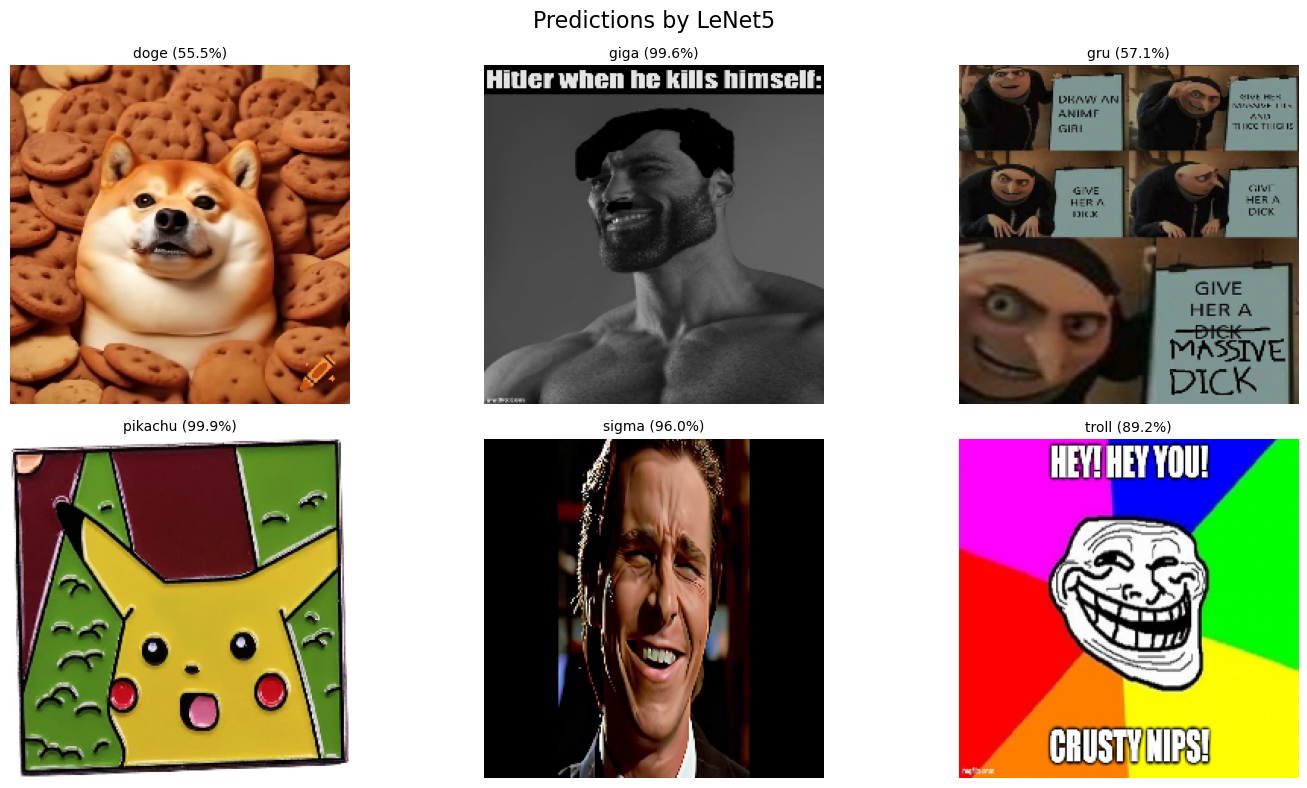


🧠 Testing AlexNet
Expected input size: (224, 224)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


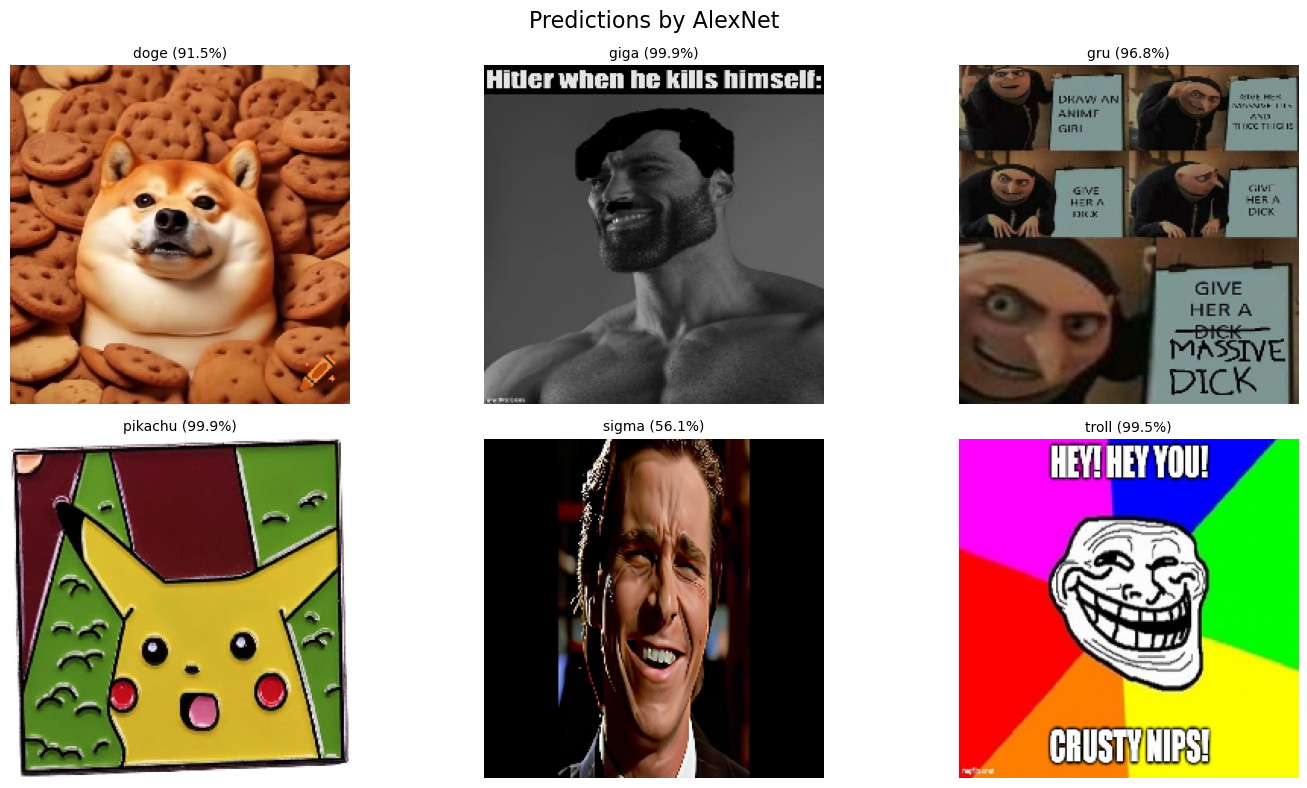


🧠 Testing VGG16
Expected input size: (224, 224)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 983ms/step


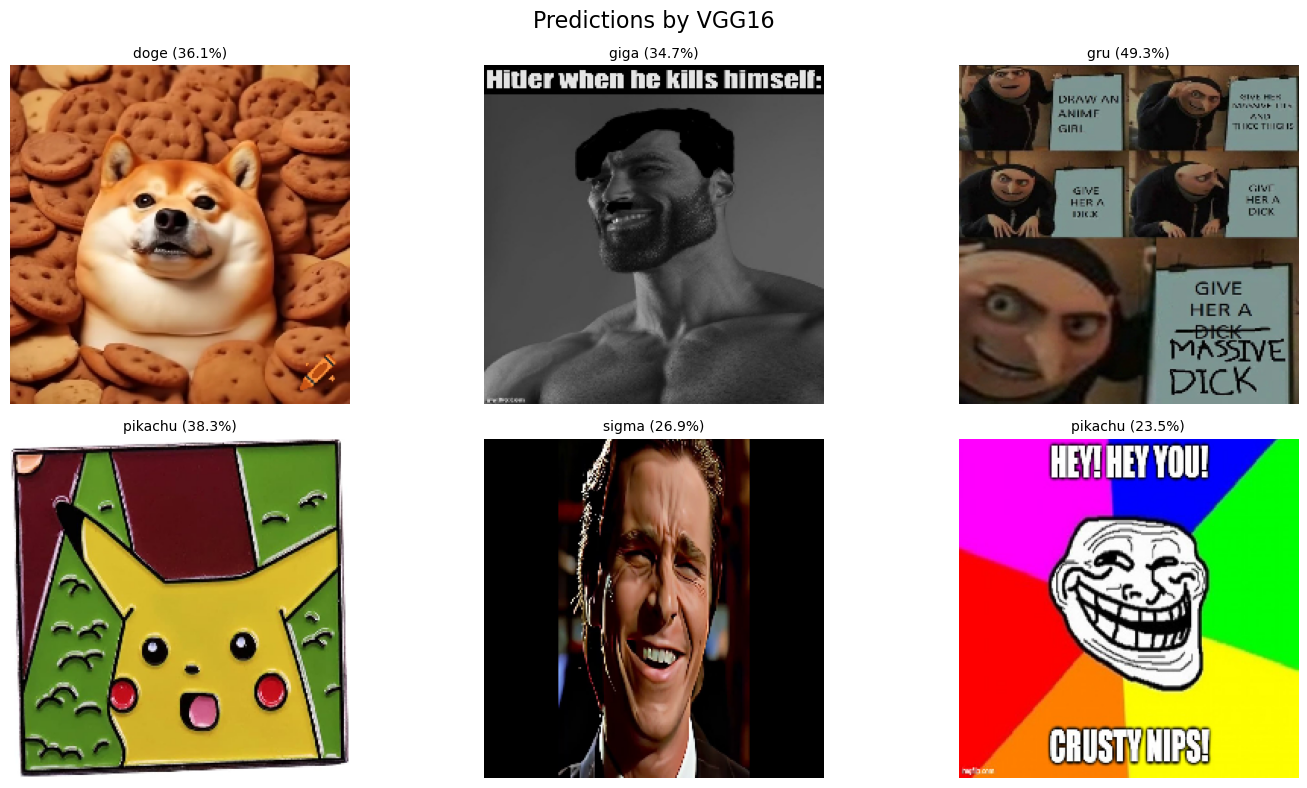


🧠 Testing ResNet50
Expected input size: (224, 224)
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


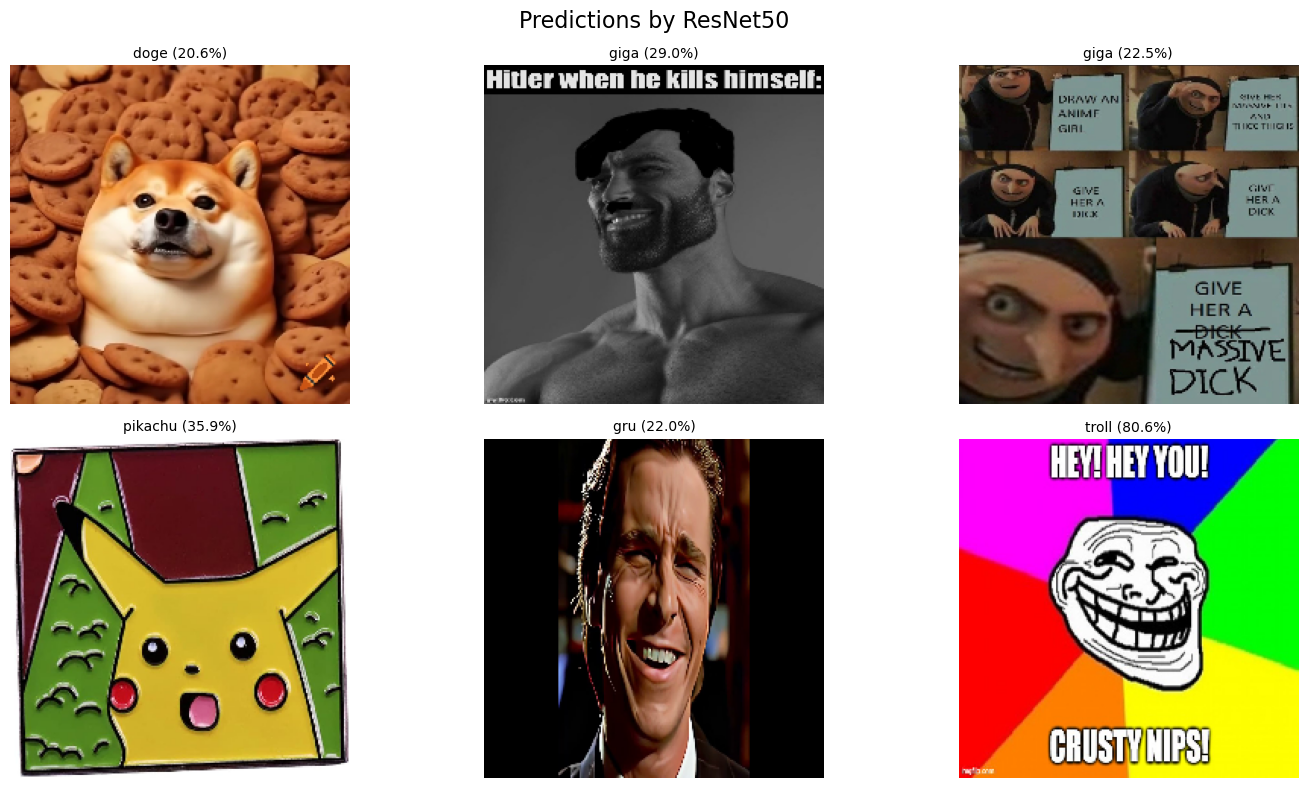


🧠 Testing InceptionV3
Expected input size: (224, 224)
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


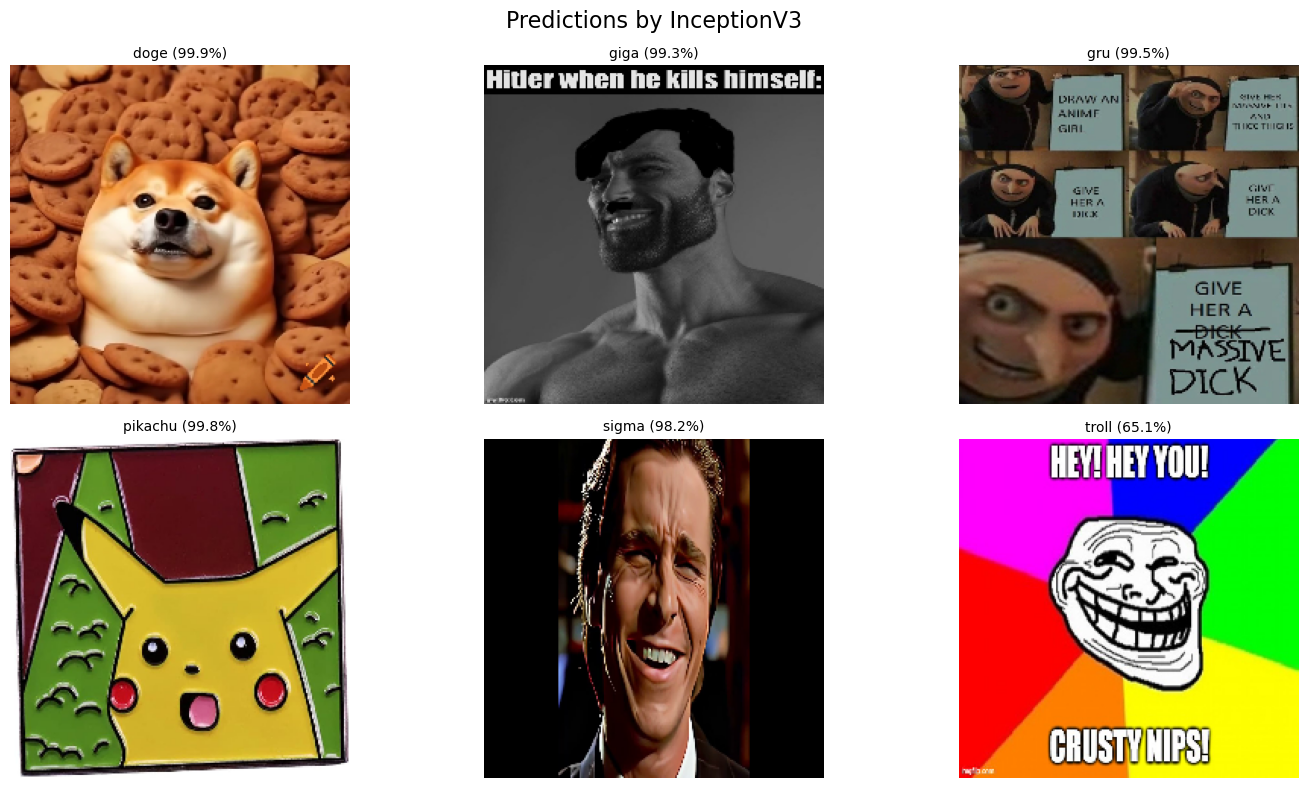


🧠 Testing MobileNetV2
Expected input size: (224, 224)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


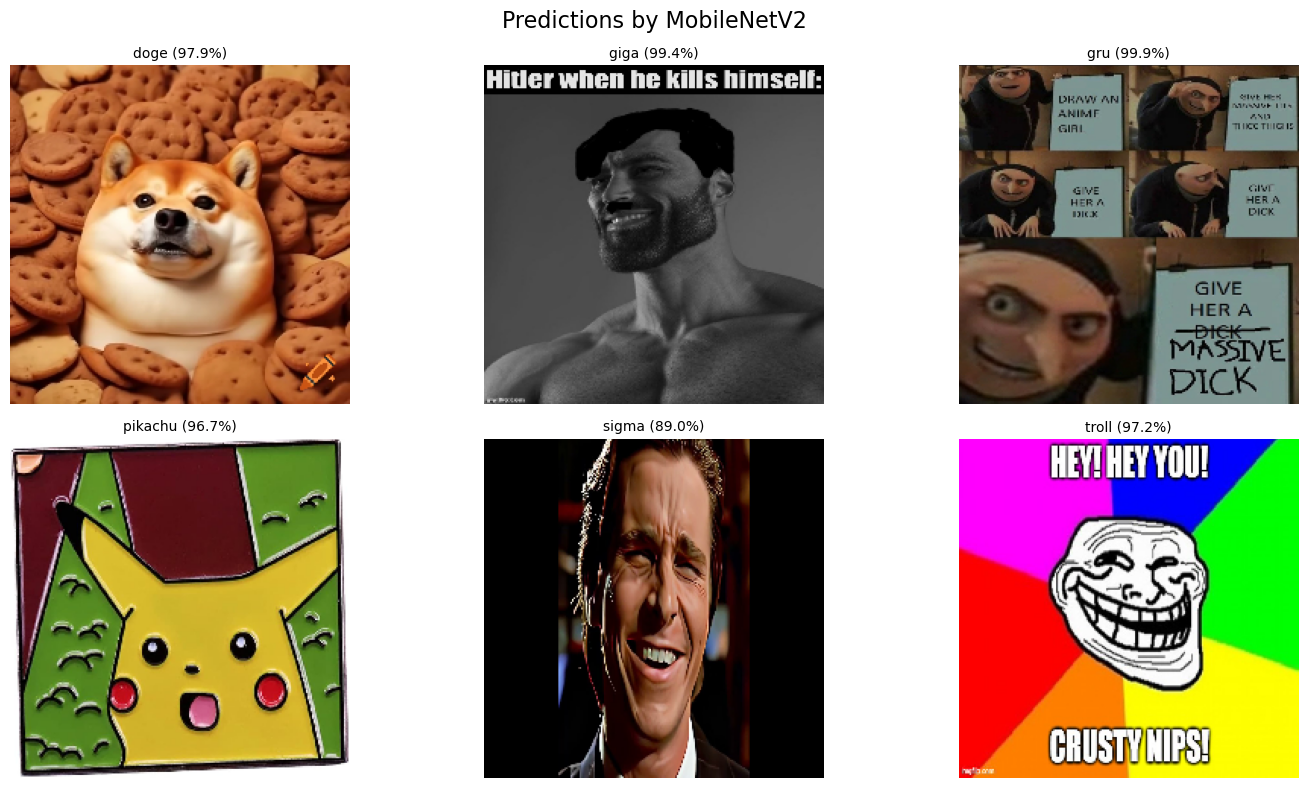


🧠 Testing Base Model
Expected input size: (256, 256)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


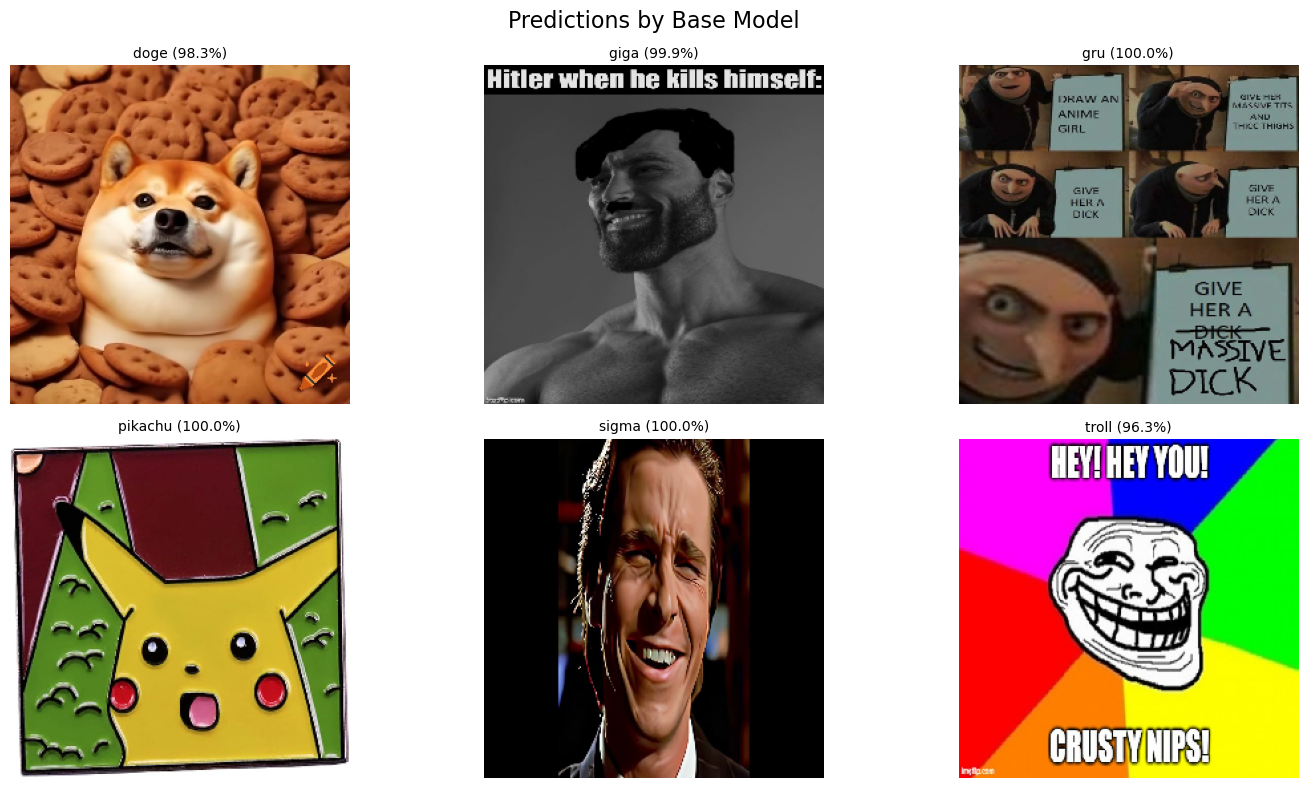

In [28]:
for model_name, model_path in cnn_models.items():
    print(f"\nTesting {model_name}")
    
    model = tf.keras.models.load_model(model_path)
    input_shape = model.input_shape[1:3]
    print(f"Expected input size: {input_shape}")

    img_tensors = []
    original_imgs = []
    for path in image_paths:
        img = keras_image.load_img(path, target_size=input_shape)
        img_array = keras_image.img_to_array(img) / 255.0
        img_tensors.append(img_array)
        original_imgs.append(img)

    img_batch = np.stack(img_tensors, axis=0)

    predictions = model.predict(img_batch)
    predicted_classes = np.argmax(predictions, axis=1)
    confidences = np.max(predictions, axis=1)

    plt.figure(figsize=(15, 8))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(original_imgs[i])
        label = class_names[predicted_classes[i]]
        conf = confidences[i] * 100
        plt.title(f"{label} ({conf:.1f}%)", fontsize=10)
        plt.axis('off')
    plt.suptitle(f"Predictions by {model_name}", fontsize=16)
    plt.tight_layout()
    plt.show()